# Link do Dicionário do DATASET

https://drive.google.com/file/d/11xcaEgl1hpyfl2hnlFaa0MsxERd6uaKF/view

# Importações:

---

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


In [51]:
tabela2025 = pd.read_csv('datatran2025.csv', sep=';')
tabela2024 = pd.read_csv('datatran2024.csv', sep=';')
tabela2023 = pd.read_csv('datatran2023.csv', sep=';')
tabela2022 = pd.read_csv('datatran2022.csv', sep=';')
tabela2021 = pd.read_csv('datatran2021.csv', sep=';')
tabela2020 = pd.read_csv('datatran2020.csv', sep=';')
tabela2019 = pd.read_csv('datatran2019.csv', sep=';')
tabela2018 = pd.read_csv('datatran2018.csv', sep=';')
tabela2017 = pd.read_csv('datatran2017.csv', sep=';')
tabela2016 = pd.read_csv('datatran2016.csv', sep=';')
tabela2015 = pd.read_csv('datatran2015.csv', sep=';')
tabela2014 = pd.read_csv('datatran2014.csv', sep=';')
tabela2013 = pd.read_csv('datatran2013.csv', sep=';')
tabela2012 = pd.read_csv('datatran2012.csv', sep=';')
tabela2011 = pd.read_csv('datatran2011.csv', sep=';')
tabela2010 = pd.read_csv('datatran2010.csv', sep=';')
tabela2009 = pd.read_csv('datatran2009.csv', sep=';')
tabela2008 = pd.read_csv('datatran2008.csv', sep=';')
tabela2007 = pd.read_csv('datatran2007.csv', sep=';')


tabela2007_2025 = pd.concat([tabela2007, tabela2008, tabela2009, tabela2010, tabela2011, tabela2012, tabela2013, tabela2014, tabela2015, tabela2016, tabela2017, tabela2018, tabela2019, tabela2020, tabela2021,  tabela2022, tabela2023, tabela2024, tabela2025], ignore_index=True)


C:\Users\henri\AppData\Local\Temp\ipykernel_65196\2646515456.py:14: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  tabela2012 = pd.read_csv('datatran2012.csv', sep=';')
C:\Users\henri\AppData\Local\Temp\ipykernel_65196\2646515456.py:18: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  tabela2008 = pd.read_csv('datatran2008.csv', sep=';')
C:\Users\henri\AppData\Local\Temp\ipykernel_65196\2646515456.py:19: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  tabela2007 = pd.read_csv('datatran2007.csv', sep=';')


# Informações Pincipais da Tabela:
---

In [ ]:
tabela2007_2025 = tabela2007_2025.drop(columns=['latitude', 'longitude', 'regional', 'delegacia', 'uop'])


In [46]:
print(tabela2007_2025.shape)

tabela2007_2025 = tabela2007_2025.dropna()

print(tabela2007_2025.info())

(2157043, 26)
<class 'pandas.core.frame.DataFrame'>
Index: 1465837 entries, 0 to 1465836
Data columns (total 26 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id                      1465837 non-null  float64
 1   data_inversa            1465837 non-null  object 
 2   dia_semana              1465837 non-null  object 
 3   horario                 1465837 non-null  object 
 4   uf                      1465837 non-null  object 
 5   br                      1465837 non-null  object 
 6   km                      1465837 non-null  object 
 7   municipio               1465837 non-null  object 
 8   causa_acidente          1465837 non-null  object 
 9   tipo_acidente           1465837 non-null  object 
 10  classificacao_acidente  1465837 non-null  object 
 11  fase_dia                1465837 non-null  object 
 12  sentido_via             1465837 non-null  object 
 13  condicao_metereologica  1465837 non-null  object

In [47]:
print(tabela2007_2025['causa_acidente'].value_counts(ascending=False))


causa_acidente
Falta de atenção                      480991
Outras                                426555
Não guardar distância de segurança    133619
Velocidade incompatível               121594
Desobediência à sinalização            58833
Defeito mecânico em veículo            57813
Ingestão de álcool                     55102
Animais na Pista                       39219
Dormindo                               37148
Ultrapassagem indevida                 32936
Defeito na via                         22025
(null)                                     2
Name: count, dtype: int64


In [49]:
print(tabela2007_2025['ano'].value_counts())

ano
2011.0    192326
2013.0    186748
2012.0    184568
2010.0    183469
2014.0    169201
2009.0    158646
2008.0    141043
2007.0    127675
2015.0    122161
Name: count, dtype: int64


In [31]:
print(tabela2007_2025['tipo_acidente'].value_counts(ascending=False))

tipo_acidente
Colisão traseira                              414951
Colisão lateral                               242766
Saída de Pista                                216655
Colisão Transversal                           145838
Colisão com objeto fixo                        87529
Capotamento                                    69540
Tombamento                                     58803
Colisão frontal                                53194
Queda de motocicleta / bicicleta / veículo     46421
Atropelamento de pessoa                        40427
Atropelamento de animal                        34040
Colisão com bicicleta                          17313
Colisão com objeto móvel                       14353
Danos Eventuais                                 9345
Derramamento de Carga                           8190
Incêndio                                        6472
Name: count, dtype: int64


# Analise Temporal
-----

In [32]:
# tabela2007_2025 a data inversa pra datetime
tabela2007_2025['data_inversa'] = pd.to_datetime(tabela2007_2025['data_inversa'],errors='coerce')

meses = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho',
         7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}

# Criando colunas derivadas
tabela2007_2025.loc[:,'ano'] = tabela2007_2025['data_inversa'].dt.year
tabela2007_2025.loc[:,'mes'] = tabela2007_2025['data_inversa'].dt.month
tabela2007_2025.loc[:,'hora'] = pd.to_datetime(tabela2007_2025['horario'], format='%H:%M:%S', errors='coerce').dt.hour

tabela2007_2025['mes'] = tabela2007_2025['mes'].map(meses)

display(tabela2007_2025.head())

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,mes,hora
0,10.0,2007-11-06,Segunda,15:30:00,MG,381,623.2,OLIVEIRA,Falta de atenção,Colisão frontal,...,9,0,4,0,5,0,4,6,Novembro,15
1,10.0,2007-11-06,Segunda,15:30:00,MG,381,623.2,OLIVEIRA,Falta de atenção,Colisão frontal,...,9,0,4,0,5,0,4,6,Novembro,15
2,1032898.0,NaT,Segunda,14:25:00,MG,40,585.5,ITABIRITO,Outras,Saída de Pista,...,3,0,0,1,2,0,1,1,NaN,14
3,1051130.0,2007-12-02,Segunda,02:10:00,MA,135,11.0,SAO LUIS,Animais na Pista,Atropelamento de animal,...,5,2,2,1,0,0,3,1,Dezembro,2
4,1066824.0,NaT,Terça,05:30:00,CE,222,30.8,CAUCAIA,Defeito mecânico em veículo,Capotamento,...,1,0,1,0,0,0,1,1,NaN,5


In [33]:
tabela2007_2025['horario'].unique()

array(['15:30:00', '14:25:00', '02:10:00', ..., '19:10:08', '00:20:47',
       '08:08:30'], dtype=object)

In [34]:
# Acidentes por dia da semana
acidentes_por_dia = tabela2007_2025['dia_semana'].value_counts(ascending=False)

print('Acidentes por dia:')
display(acidentes_por_dia)



Acidentes por dia:


dia_semana
Sexta      239453
Sábado     226822
Domingo    215297
Segunda    202112
Quinta     201664
Quarta     193409
Terça      187080
Name: count, dtype: int64

In [35]:
# Acidentes por hora
acidentes_por_hora = tabela2007_2025['horario'].value_counts().sort_values(ascending=False)

print('\nAcidentes por hora:')
print(acidentes_por_hora)


Acidentes por hora:
horario
18:00:00    23635
19:00:00    23163
18:30:00    22925
16:00:00    21296
17:00:00    21222
            ...  
07:10:15        1
15:00:44        1
17:32:51        1
07:15:03        1
08:08:30        1
Name: count, Length: 1485, dtype: int64


In [36]:
# Acidentes por mês
acidentes_por_mes = tabela2007_2025.groupby('mes').size()

print('\nAcidentes por mês:')
print(acidentes_por_mes)


Acidentes por mês:
mes
Abril        27035
Agosto       27099
Dezembro     26991
Fevereiro    26066
Janeiro      26013
Julho        26339
Junho        26394
Maio         26669
Março        26080
Novembro     26423
Outubro      26758
Setembro     27417
dtype: int64


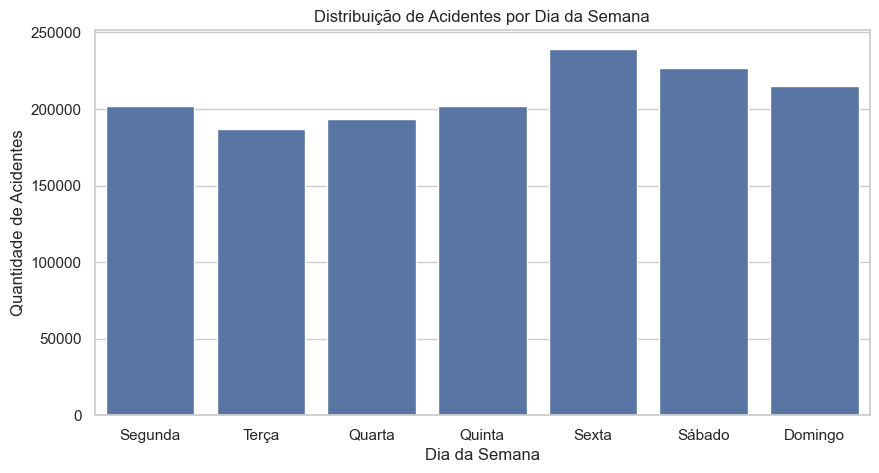

In [37]:
sns.set_theme(style="whitegrid")


# Acidentes por Dia da Semana
plt.figure(figsize=(10,5))
sns.countplot(data=tabela2007_2025, x='dia_semana', order=['Segunda','Terça','Quarta','Quinta','Sexta','Sábado','Domingo'])
plt.title('Distribuição de Acidentes por Dia da Semana')
plt.ylabel('Quantidade de Acidentes')
plt.xlabel('Dia da Semana')
plt.show()

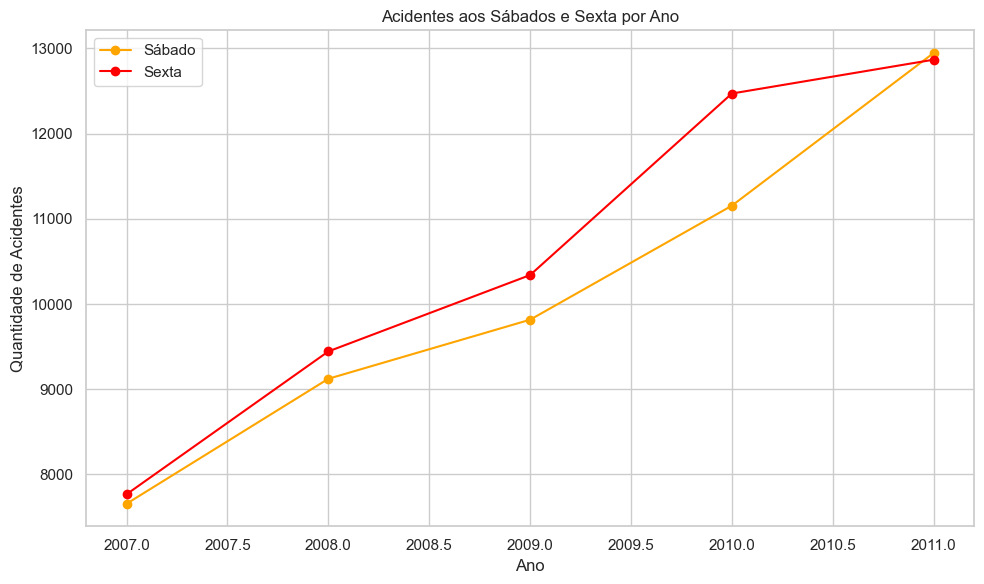

In [41]:
import matplotlib.pyplot as plt

# Garantir que data_inversa é datetime
tabela2007_2025['data_inversa'] = pd.to_datetime(tabela2007_2025['data_inversa'], dayfirst=True)

# Criar coluna com ano
tabela2007_2025['ano'] = tabela2007_2025['data_inversa'].dt.year

# Filtrar apenas sábado e domingo
filtro = tabela2007_2025['dia_semana'].isin(['Sábado', 'Sexta'])
df_fds = tabela2007_2025[filtro]

# Contagem por ano e dia da semana
contagem = df_fds.groupby(['ano', 'dia_semana']).size().unstack(fill_value=0)

# Criar gráfico
plt.figure(figsize=(10, 6))
plt.plot(contagem.index, contagem['Sábado'], marker='o', label='Sábado', color='orange')
plt.plot(contagem.index, contagem['Sexta'], marker='o', label='Sexta', color='red')

plt.title('Acidentes aos Sábados e Sexta por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Acidentes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


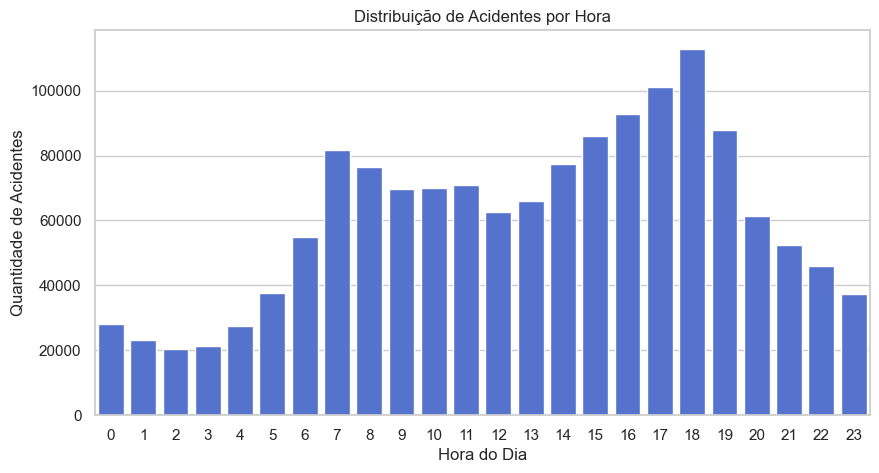

In [38]:
# Acidentes por hora do dia
plt.figure(figsize=(10,5))
sns.countplot(data=tabela2007_2025, x='hora', color='royalblue')
plt.title('Distribuição de Acidentes por Hora')
plt.ylabel('Quantidade de Acidentes')
plt.xlabel('Hora do Dia')
plt.show()

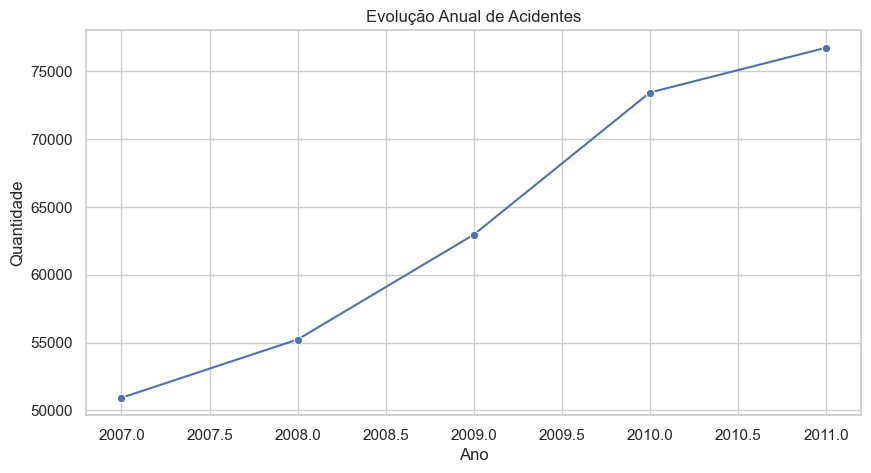

In [39]:
# Evolução ao longo dos anos (linha)
evolucao = tabela2007_2025.groupby('ano').size().reset_index(name='acidentes')
plt.figure(figsize=(10,5))
sns.lineplot(data=evolucao, x='ano', y='acidentes', marker='o')
plt.title('Evolução Anual de Acidentes')
plt.ylabel('Quantidade')
plt.xlabel('Ano')
plt.show()

## Primeira Conclusão da Análise Temporal
Apesar de percebermos que os dados estão bem destribuidos, nos finais de semana à noite, entre às 17 e 19 horas, são onde ocorrem a maioria dos acidentes

---

# Analise Geografica
---

In [ ]:
# Locais de Principais Ocorrências de Acidentes
# Acidentes por UF (estado)
print(tabela2007_2025['uf'].value_counts())

# Acidentes por município
print(tabela2007_2025['municipio'].value_counts())

uf
MG    303010
PR    250372
SC    207308
RS    161972
SP    150921
RJ    124966
BA    118001
GO    116341
PE     87264
MT     80563
MS     78711
RO     71340
PB     59414
PI     58948
ES     54914
PA     52441
CE     46766
MA     44492
RN     34461
DF     34147
TO     30756
AL     13482
SE     13439
AC      8674
AM      7273
RR      7187
AP      5699
Name: count, dtype: int64
municipio
BRASILIA               34147
GUARULHOS              29070
CURITIBA               28676
SAO JOSE               20211
BETIM                  19799
                       ...  
BRASNORTE                  1
TELEMACO BORBA             1
CAMPINA DA LAGOA           1
SAO RAIMUNDO NONATO        1
MACAMBARA                  1
Name: count, Length: 2002, dtype: int64


## Conclusões Análise Geografica:
Estados de Minas Gerais, Santa Catarina, Paraná, Rio de Janeiro e Rio Grande do Sul são os estados mais abundantes em acidentes de t^ransito. A gente pode restringir a pesquisa para esses 5 estados.

---

# Gravidade e Vítimas 
---

In [21]:
# Classificação dos acidentes
print(tabela2020_2025['classificacao_acidente'].value_counts())


# Mortos e feridos leves por tipo de acidente
resultado = tabela2020_2025.groupby('tipo_acidente')[['mortos', 'feridos_leves']].sum()
resultado['total'] = resultado['mortos'] + resultado['feridos_leves']
resultado_ordenado = resultado.sort_values('total', ascending=False)

print(resultado_ordenado)


classificacao_acidente
Com Vítimas Feridas    1691463
Com Vítimas Fatais      326339
Sem Vítimas             205060
Name: count, dtype: int64
                                  mortos  feridos_leves     total
tipo_acidente                                                    
Saída de leito carroçável        19753.0       130259.0  150012.0
Tombamento                       16003.0       125637.0  141640.0
Queda de ocupante de veículo     15739.0       108886.0  124625.0
Colisão traseira                  7906.0       105808.0  113714.0
Colisão com objeto                9437.0        67156.0   76593.0
Capotamento                       7452.0        65470.0   72922.0
Colisão transversal               5170.0        63623.0   68793.0
Colisão frontal                  20817.0        46669.0   67486.0
Colisão lateral mesmo sentido     2482.0        44608.0   47090.0
Colisão lateral sentido oposto    2730.0        15623.0   18353.0
Colisão com objeto estático       1504.0        12099.0   13603.0


In [22]:
# Total de mortos e feridos em acidentes com álcool
print(tabela2020_2025['mortos'].value_counts())
print(f'Total: {0}',tabela2020_2025['mortos'].value_counts(ascending=False).sum())

mortos
0.0    2105049
1.0     117813
Name: count, dtype: int64
Total: 0 2222862
